In [95]:
import cirq
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

James Amidei

Dr. Tim Lei 

PHYS 4679

Quantum Computing Homework #2

# Table of Contents
- [Question 1](#Question-1)

- [Question 2](#Question-2)


# Question 1
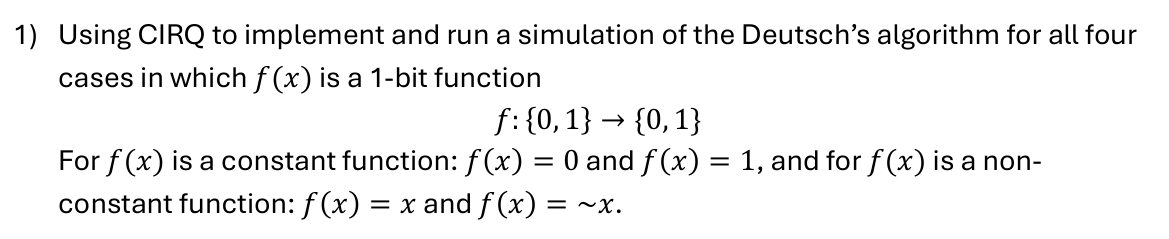

- [Table of Contents](#Table-of-Contents)

In [50]:
q0, q1 = cirq.LineQubit.range(2)

oracles = {'0': [], '1': [cirq.X(q1)], 'x': [cirq.CNOT(q0, q1)], 
           '~x': [cirq.CNOT(q0, q1), cirq.X(q1)]}

#def deutsch_algo(oracle):
#    yield cirq.X(q1)
#    yield cirq.H(q0), cirq.H(q1)
#    yield oracle
#    yield cirq.H(q0)
#    yield cirq.measure(q0)

def deutsch_algo(oracle):
    circuit = cirq.Circuit()
    circuit.append([cirq.X(q1), cirq.H(q0), cirq.H(q1)])
    circuit.append(oracle)
    circuit.append([cirq.H(q0), cirq.measure(q0)])
    return circuit


for key, oracle in oracles.items():
    print('Circuit for {}...'.format(key))
    print(cirq.Circuit(deutsch_algo(oracle)), end="\n\n")

simulator = cirq.Simulator()

for key, oracle in oracles.items():
    result = simulator.run(
        cirq.Circuit(deutsch_algo(oracle)),
        repetitions=10
    )
    print('oracle: {:<4} results: {}'.format(key, result))

Circuit for 0...
0: ───H───H───M───

1: ───X───H───────

Circuit for 1...
0: ───H───H───M───

1: ───X───H───X───

Circuit for x...
0: ───H───────@───H───M───
              │
1: ───X───H───X───────────

Circuit for ~x...
0: ───H───────@───H───M───
              │
1: ───X───H───X───X───────

oracle: 0    results: q(0)=0000000000
oracle: 1    results: q(0)=0000000000
oracle: x    results: q(0)=1111111111
oracle: ~x   results: q(0)=1111111111


In [32]:
# Import the Cirq Library
import cirq

# Get two qubits: input qubit (q0) and auxiliary qubit (q1)
q0, q1 = cirq.LineQubit.range(2)

# Define the four oracles for Deutsch’s algorithm
oracles = {
    '0': [],  # Constant function f(x) = 0
    '1': [cirq.X(q1)],  # Constant function f(x) = 1
    'x': [cirq.CNOT(q0, q1)],  # Balanced function f(x) = x
    'notx': [cirq.CNOT(q0, q1), cirq.X(q1)]  # Balanced function f(x) = ~x
}

def deutsch_algo(oracle):
    circuit = cirq.Circuit()
    circuit.append([cirq.X(q1), cirq.H(q0), cirq.H(q1)])  # Initialization
    circuit.append(oracle)  # Apply oracle
    circuit.append([cirq.H(q0), cirq.measure(q0)])  # Final Hadamard and measurement
    return circuit

# Display each circuit for all oracles
for key, oracle in oracles.items():
    print(f'Circuit for {key}...')
    print(deutsch_algo(oracle), end="\n\n")

# Get a simulator
simulator = cirq.Simulator()

# Execute the circuit for each oracle and display results
for key, oracle in oracles.items():
    circuit = deutsch_algo(oracle)
    result = simulator.run(circuit, repetitions=10)
    measurements = result.measurements[str(q0)].flatten()  # ✅ FIXED: Use str(q0)
    print(f'Oracle: {key:<4} Results: {measurements}')


Circuit for 0...
0: ───H───H───M───

1: ───X───H───────

Circuit for 1...
0: ───H───H───M───

1: ───X───H───X───

Circuit for x...
0: ───H───────@───H───M───
              │
1: ───X───H───X───────────

Circuit for notx...
0: ───H───────@───H───M───
              │
1: ───X───H───X───X───────

Oracle: 0    Results: [0 0 0 0 0 0 0 0 0 0]
Oracle: 1    Results: [0 0 0 0 0 0 0 0 0 0]
Oracle: x    Results: [1 1 1 1 1 1 1 1 1 1]
Oracle: notx Results: [1 1 1 1 1 1 1 1 1 1]


# Question 2

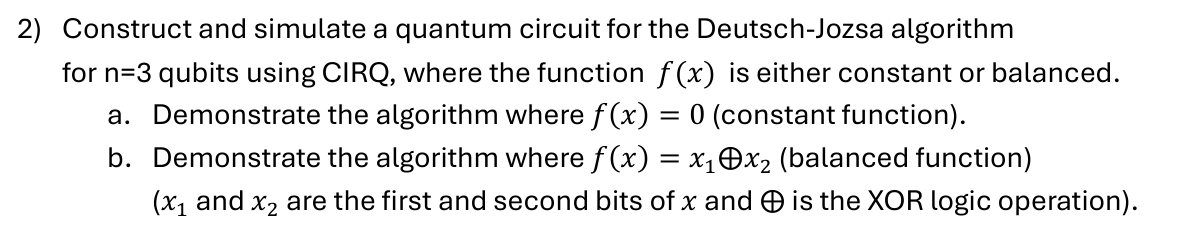

- [Table of Contents](#Table-of-Contents)

In [92]:
q0, q1, q2 = cirq.LineQubit.range(3)

constant = ([], [cirq.X(q2)])

balanced = ([cirq.CNOT(q0, q2)], 
           [cirq.CNOT(q1, q2)],
           [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2)], 
           [cirq.CNOT(q0, q2), cirq.X(q2)], 
           [cirq.CNOT(q1, q2), cirq.X(q2)], 
           [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2), cirq.X(q2)])

def your_circuit(oracle):
    yield cirq.X(q2), cirq.H(q2)
    yield cirq.H(q0), cirq.H(q1)
    yield oracle 
    yield cirq.H(q0), cirq.H(q1), cirq.H(q2)
    yield cirq.X(q0), cirq.X(q1), cirq.CCX(q0, q1, q2)
    yield cirq.measure(q2)

simulator = cirq.Simulator()

print('Your result on constant functions')

for i, oracle in enumerate(constant):
    circuit = cirq.Circuit(your_circuit(oracle))
    result = simulator.run(circuit, repetitions=10)
    print(circuit, '\n\n', result, '\n\n')

print('Your result on balanced functions\n')
for i, oracle in enumerate(balanced):
    circuit = cirq.Circuit(your_circuit(oracle))
    result = simulator.run(cirq.Circuit(your_circuit(oracle)), repetitions=10)
    print(circuit, '\n\n', result, '\n\n')

Your result on constant functions
0: ───H───H───X───@───────
                  │
1: ───H───H───X───@───────
                  │
2: ───X───H───H───X───M─── 

 q(2)=0000000000 


0: ───H───H───X───────@───────
                      │
1: ───H───H───X───────@───────
                      │
2: ───X───H───X───H───X───M─── 

 q(2)=0000000000 


Your result on balanced functions

              ┌──┐
0: ───H────────@─────H───X───@───────
               │             │
1: ───H───H────┼X────────────@───────
               │             │
2: ───X───H────X─────H───────X───M───
              └──┘ 

 q(2)=1111111111 


0: ───H───H───X───────────@───────
                          │
1: ───H───────@───H───X───@───────
              │           │
2: ───X───H───X───H───────X───M─── 

 q(2)=1111111111 


0: ───H───────@───H───X───────@───────
              │               │
1: ───H───────┼───@───H───X───@───────
              │   │           │
2: ───X───H───X───X───H───────X───M─── 

 q(2)=1111111111 


   

In [66]:
import cirq

# Create 3 qubits
q0, q1, q2 = cirq.LineQubit.range(3)

# Define constant and balanced oracles
constant = ([], [cirq.X(q2)])
balanced = ([cirq.CNOT(q0, q2)], 
           [cirq.CNOT(q1, q2)],
           [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2)], 
           [cirq.CNOT(q0, q2), cirq.X(q2)], 
           [cirq.CNOT(q1, q2), cirq.X(q2)], 
           [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2), cirq.X(q2)])

def your_circuit(oracle):
    yield cirq.X(q2), cirq.H(q2)
    yield cirq.H(q0), cirq.H(q1)
    yield oracle 
    yield cirq.H(q0), cirq.H(q1), cirq.H(q2)
    yield cirq.X(q0), cirq.X(q1), cirq.CCX(q0, q1, q2)
    yield cirq.measure(q2)

# Print circuits for constant functions
print('Circuits for constant functions:')
for i, oracle in enumerate(constant):
    circuit = cirq.Circuit(your_circuit(oracle))
    print(f"\nConstant function #{i+1}:")
    print(circuit)

# Print circuits for balanced functions
print('\nCircuits for balanced functions:')
for i, oracle in enumerate(balanced):
    circuit = cirq.Circuit(your_circuit(oracle))
    print(f"\nBalanced function #{i+1}:")
    print(circuit)

# Run simulations
simulator = cirq.Simulator()
print('\nYour result on constant functions:')
for oracle in constant: 
    result = simulator.run(cirq.Circuit(your_circuit(oracle)), repetitions=10)
    print(result)

print('\nYour result on balanced functions:')
for oracle in balanced:
    result = simulator.run(cirq.Circuit(your_circuit(oracle)), repetitions=10)
    print(result)

Circuits for constant functions:

Constant function #1:
0: ───H───H───X───@───────
                  │
1: ───H───H───X───@───────
                  │
2: ───X───H───H───X───M───

Constant function #2:
0: ───H───H───X───────@───────
                      │
1: ───H───H───X───────@───────
                      │
2: ───X───H───X───H───X───M───

Circuits for balanced functions:

Balanced function #1:
              ┌──┐
0: ───H────────@─────H───X───@───────
               │             │
1: ───H───H────┼X────────────@───────
               │             │
2: ───X───H────X─────H───────X───M───
              └──┘

Balanced function #2:
0: ───H───H───X───────────@───────
                          │
1: ───H───────@───H───X───@───────
              │           │
2: ───X───H───X───H───────X───M───

Balanced function #3:
0: ───H───────@───H───X───────@───────
              │               │
1: ───H───────┼───@───H───X───@───────
              │   │           │
2: ───X───H───X───X───H───────X───M───
